In [2]:
import numpy as np
import scipy as sp
import pandas as pd
from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [3]:
data=pd.read_csv('Lesson9.csv')
data.head()

,Lost_number,Temperature,Humidity
0,6,17.5,36
1,11,26.6,33
2,2,5.0,42
3,4,14.1,48
4,2,9.4,45


In [3]:
# model1（気温のみ）の作成  glm=General Linear Model 一般化線形モデル
model_1=smf.glm('Lost_number ~ Temperature', data=data, family=sm.families.Poisson()).fit()

In [4]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Lost_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Tue, 26 Nov 2019   Deviance:                       5.1373
Time:                        12:52:46   Pearson chi2:                     5.40
No. Iterations:                     4   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
Temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

In [5]:
# model2（気温、湿度）の作成
model_2=smf.glm('Lost_number ~ Temperature+Humidity',data=data,family=sm.families.Poisson()).fit()

In [6]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Lost_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       27
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.668
Date:                Tue, 26 Nov 2019   Deviance:                       5.1308
Time:                        12:52:46   Pearson chi2:                     5.40
No. Iterations:                     4   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4128      0.477      0.865      0.387      -0.523       1.348
Temperature     0.0761      0.008      9.726      0.000       0.061       0.091
Humidity        0.0008      0.010      0.080      0.936      -0.019       0.020
===============================================================================
"""

In [7]:
# AICで比較
print('Model_1:',model_1.aic.round())
print('Model_2:',model_2.aic.round())

Model_1: 119.0
Model_2: 121.0


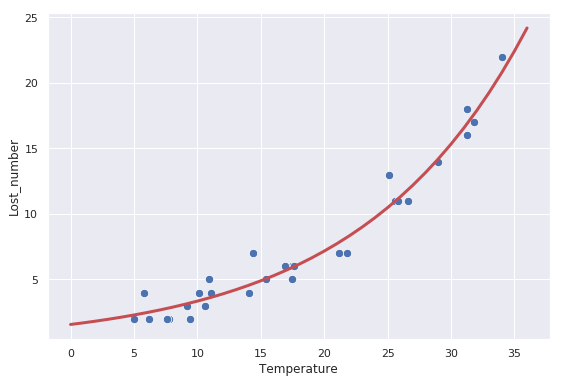

In [20]:
# 回帰直線の図示
fig, ax = plt.subplots(figsize=(9,6))

x = np.arange(0,37)
temp = pd.DataFrame({'Temperature': x})

pred= model_1.predict(temp)

sns.scatterplot(x='Temperature', y='Lost_number', data=data, s=70)
plt.plot(x,pred,color='r',lw=3)